In [1]:
# 시계열 분석 프로젝트

이 노트북은 UV 패키지 매니저로 관리되는 환경에서 실행됩니다.

## 설치된 주요 패키지들
- pandas: 데이터 처리
- numpy: 수치 계산
- matplotlib: 시각화
- seaborn: 통계 시각화
- plotly: 인터랙티브 시각화
- scikit-learn: 머신러닝


SyntaxError: invalid syntax (673976472.py, line 3)

In [ ]:
# 필수 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("라이브러리 import 완료!")
print(f"Pandas 버전: {pd.__version__}")
print(f"NumPy 버전: {np.__version__}")


라이브러리 import 완료!
Pandas 버전: 2.3.1
NumPy 버전: 2.2.6


In [3]:
# 간단한 시계열 데이터 생성 예제
import datetime

# 날짜 범위 생성
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')

# 가상의 시계열 데이터 생성 (트렌드 + 계절성 + 노이즈)
np.random.seed(42)
trend = np.linspace(100, 200, len(date_range))
seasonal = 10 * np.sin(2 * np.pi * np.arange(len(date_range)) / 365.25)
noise = np.random.normal(0, 5, len(date_range))
values = trend + seasonal + noise

# DataFrame 생성
df = pd.DataFrame({
    'date': date_range,
    'value': values
})

print(f"데이터셋 크기: {df.shape}")
print("\n데이터 미리보기:")
df.head()


데이터셋 크기: (731, 2)

데이터 미리보기:


,date,value
0,2023-01-01,102.483571
1,2023-01-02,99.617681
2,2023-01-03,103.856396
3,2023-01-04,108.541952
4,2023-01-05,100.064732


/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_58035/851573760.py:18: UserWarn

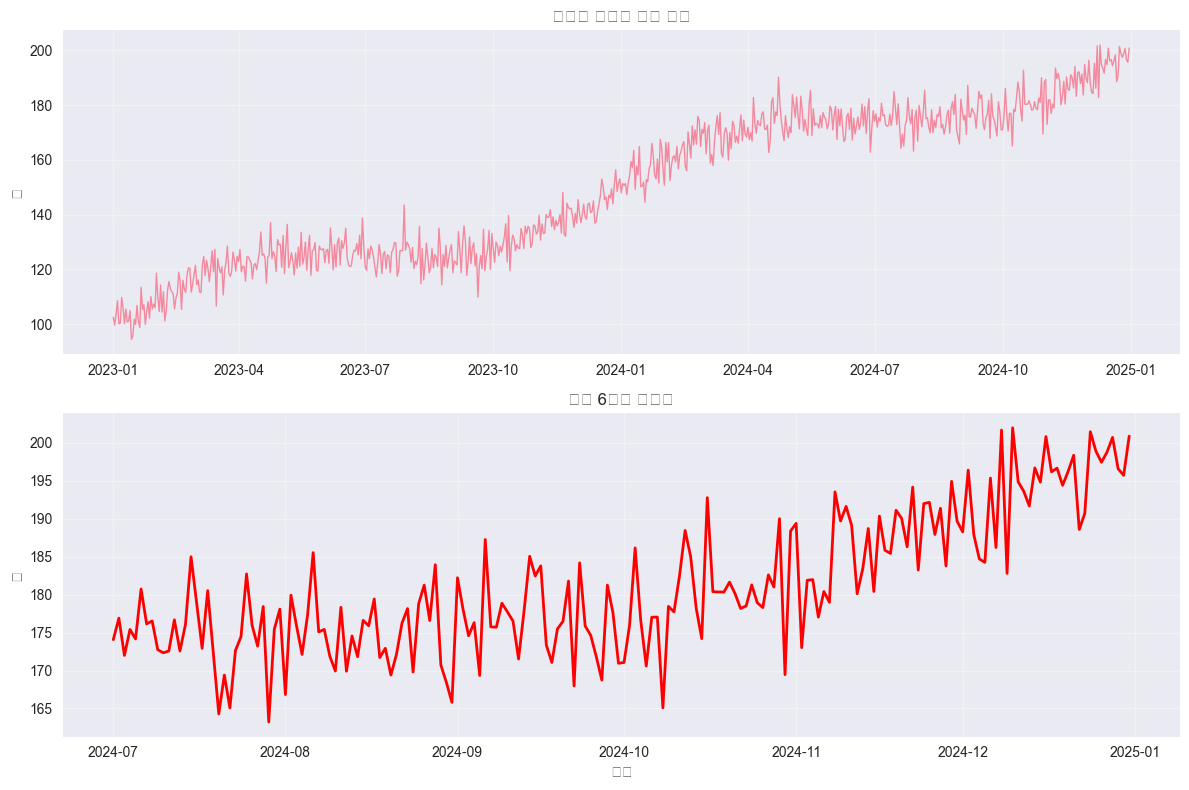

In [ ]:
# 기본 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 전체 시계열 플롯
axes[0].plot(df['date'], df['value'], linewidth=1, alpha=0.8)
axes[0].set_title('Time Series Data')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# 최근 6개월 확대
recent_data = df[df['date'] >= '2024-07-01']
axes[1].plot(recent_data['date'], recent_data['value'], linewidth=2, color='red')
axes[1].set_title('Recent 6 Months Data')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Plotly를 사용한 인터랙티브 시각화
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['value'],
    mode='lines',
    name='시계열 데이터',
    line=dict(color='blue', width=1)
))

fig.update_layout(
    title='인터랙티브 시계열 차트',
    xaxis_title='날짜',
    yaxis_title='값',
    height=500
)

fig.show()
